$$\LARGE{\text{Computational Methods (PH49012),Spring-2022, IIT KGP}}$$<br>$$\large{\text{Bapi Basak}}$$<br>$$\large{\text{Roll:21PH40016}}$$

# Imports

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange

# Question 1:Tom and Jerry can often be friends in our TV sets. But the reality is different?


$$\frac{dx}{dt}=\alpha x-\beta xy$$

$$\frac{dy}{dt}=\gamma xy-\delta y$$

In [70]:
def dx(t, x, y, alpha,beta):
    return alpha*x-beta*x*y

def dy(t, x, y, gumma,delta):
    return gumma*x*y-delta*y         #define coupled differential equations


h=0.01                                                #Interval
t=30.0                                                #Final Time

alpha = 1.0      
beta = 0.5
gumma=0.5
delta=2.0                                             #Constants

t0,x0,y0=0, 2, 2                                      #Initial values

t_arr=[]
x_arr=[]
y_arr=[]                             #define empty lists for t,x,y variables

while(t0<=t):
    t_arr.append(t0)
    x_arr.append(x0)
    y_arr.append(y0)

    k1=h*dx(t0,x0,y0,alpha,beta);
    m1=h*dy(t0,x0,y0,gumma,delta);
    k2=h*dx(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,alpha,beta);
    m2=h*dy(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,gumma,delta);
    k3=h*dx(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,alpha,beta);
    m3=h*dy(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,gumma,delta);
    k4=h*dx(t0+x0,x0+k3,y0+m3,alpha,beta);
    m4=h*dy(t0+x0,x0+k3,y0+m3,gumma,delta);

    x=x0+1/6.0*(k1+2*k2+2*k3+k4);
    y=y0+1/6.0*(m1+2*m2+2*m3+m4);

    x0=x;
    y0=y;
    t0=t0+h;                             #RK4 method

Text(0, 0.5, 'No. of Cats')

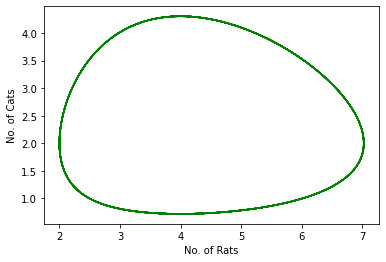

In [71]:
plt.plot(x_arr,y_arr,c='g')
plt.xlabel('No. of Rats')
plt.ylabel('No. of Cats')                #plots

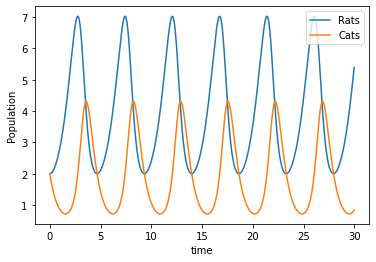

In [72]:
plt.plot(t_arr,x_arr,label=r'Rats')
plt.plot(t_arr,y_arr,label=r'Cats')
plt.xlabel('time')
plt.ylabel('Population')
plt.legend(loc='best')                   #plots

# Question 2:Let’s capture the attractive butterfly!


$$\frac{dx}{dt}=\sigma(y-x)$$

$$\frac{dy}{dt}=rx-y-xz$$

$$\frac{dz}{dt}=xy-bz$$

In [73]:
def dx(t, x, y, z, sigma):
    return sigma*(y-x)

def dy(t, x, y, z, r):
    return x*(r-z)-y

def dz(t, x, y, z, b):
    return x*y-b*z                        #define functions

h=0.01
t=50

r = 28.0       
sigma = 10.0
b = 8.0 / 3.0                                      #constants

t0,x0,y0,z0=0, 0, 1, 0

t_arr=[]
x_arr=[]
y_arr=[]
z_arr=[]                                  #Empty lists for t,x,y,z variables

while(t0<=t):
    t_arr.append(t0)
    x_arr.append(x0)
    y_arr.append(y0)
    z_arr.append(z0)

    k1=h*dx(t0,x0,y0,z0,sigma);
    m1=h*dy(t0,x0,y0,z0,r);
    n1=h*dz(t0,x0,y0,z0,b);
    k2=h*dx(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,sigma);
    m2=h*dy(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,r);
    n2=h*dz(t0+h/2.0,x0+k1/2.0,y0+m1/2.0,z0+n1/2.0,b);
    k3=h*dx(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,sigma);
    m3=h*dy(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,r);
    n3=h*dz(t0+h/2.0,x0+k2/2.0,y0+m2/2.0,z0+n2/2.0,b);
    k4=h*dx(t0+x0,x0+k3,y0+m3,z0+n3,sigma);
    m4=h*dy(t0+x0,x0+k3,y0+m3,z0+n3,r);
    n4=h*dz(t0+x0,x0+k3,y0+m3,z0+n3,b);

    x=x0+1/6.0*(k1+2*k2+2*k3+k4);
    y=y0+1/6.0*(m1+2*m2+2*m3+m4);
    z=z0+1/6.0*(n1+2*n2+2*n3+n4);

    x0=x;
    y0=y;
    z0=z;
    t0=t0+h;                       #RK4 method

Text(0, 0.5, 'y')

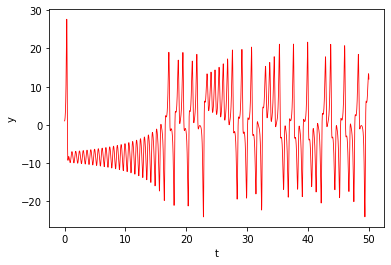

In [74]:
plt.plot(t_arr,y_arr,lw=0.8,c='r')
plt.xlabel('t')
plt.ylabel('y')

From the above graph we can see that the time variation of y variable is totally unpredictable.

Text(0, 0.5, 'z')

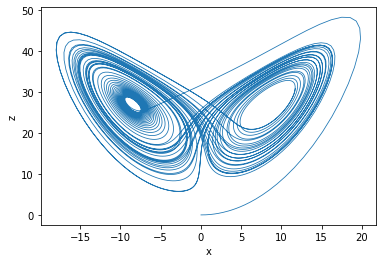

In [75]:
plt.plot(x_arr,z_arr,lw=0.8)
plt.xlabel('x')
plt.ylabel('z')

# Question 3: What’s there sitting inside your music player?


$$\dfrac{dV_{out}}{dt}=\dfrac{1}{RC}(V_{in}-V_{out})$$

$$V_{in}=1 \text{ if [2t] is even}$$
$$V_{in}=-1 \text{ if [2t] is odd}$$

In [76]:
def FF(h,RC):      #define a function for plotting input and output voltage keeping h and RC as parameter

    def dVout(t, Vin, Vout, RC):
        return (1/RC)*(Vin-Vout)        #define differential equation            



    t=0
    Vout=0
    tf=10.0                     #initial condition



    t_arr=[]
    Vin_arr=[]
    Vout_arr=[]              #define empty list for time,input voltage and output voltage variable
    

    while(t<=tf):
        if((int(2*t)%2)==0):
            Vin=1
        else:
            Vin=-1
        t_arr.append(t)
        Vin_arr.append(Vin)
        Vout_arr.append(Vout)
        k1 = h * dVout(t,Vin,Vout, RC)
        k2 = h * dVout(t + h / 2.0,Vin, Vout + k1 / 2.0,RC)
        k3 = h * dVout(t+ h / 2.0,Vin, Vout + k2 / 2.0,RC)
        k4 = h * dVout(t + h,Vin, Vout + k3,RC)
        Vout += (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        t = t + h
    return t_arr,Vin_arr,Vout_arr                #RK4 method

For checking which value of h is sufficient for giving accurate result of output waveform we have plot output voltage for differnt value of h.

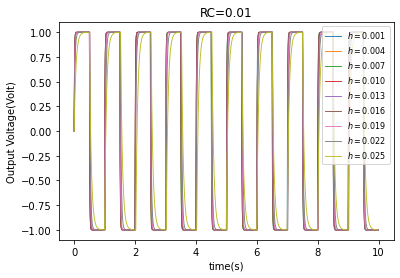

In [77]:
h1=[x for x in arange(0.001,0.027,0.003)]       #list of different h values
for i in range(len(h1)):
    h=h1[i]
    T,Vin,V0=FF(h,0.01)
    plt.plot(T,V0,lw=0.9,label=r'$h={%.3f}$'%h)
    plt.xlabel('time(s)')
    plt.ylabel('Output Voltage(Volt)')    #plotting output voltage for different h values
    plt.legend(loc='upper right',prop={'size':8})
    plt.title('RC=0.01')
plt.show()

From the graph we can conclude that h=0.001 is a good choice as the shape of the graph is not changing beyond this h value.

Text(0, 0.5, 'Intput voltage')

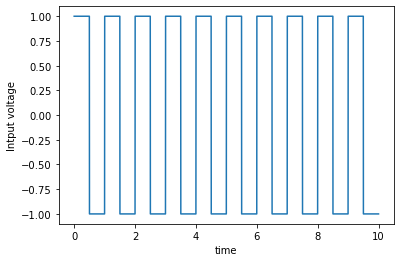

In [78]:
T,Vin,V0=FF(0.001,0.1)
plt.plot(T,Vin)
plt.xlabel('time')
plt.ylabel('Intput voltage')      #plot of input voltage waveform

Text(0, 0.5, 'Output voltage')

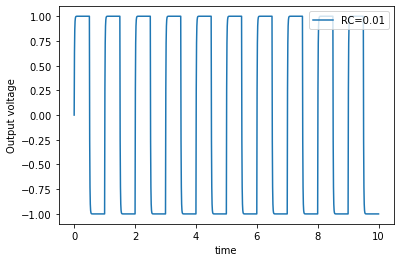

In [79]:
T1,Vin1,V01=FF(0.001,0.01)
plt.plot(T1,V01,label=r'RC=0.01')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('Output voltage')       #plot of output voltage waveform for RC=0.01

Text(0, 0.5, 'Output voltage')

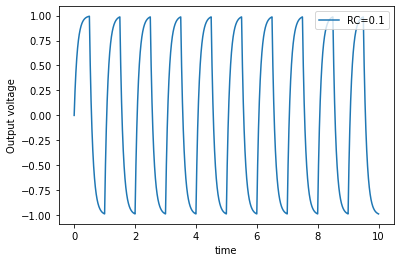

In [80]:
T2,Vin2,V02=FF(0.001,0.1)
plt.plot(T2,V02,label=r'RC=0.1')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('Output voltage')    #plot of output voltage waveform for RC=0.1

Text(0, 0.5, 'Output voltage')

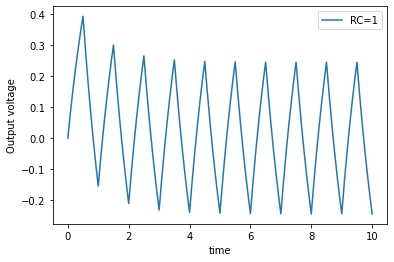

In [81]:
T3,Vin3,V03=FF(0.001,1)
plt.plot(T3,V03,label=r'RC=1')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('Output voltage')     #plot of output voltage waveform for RC=1

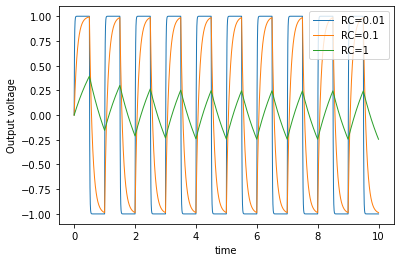

In [82]:
plt.plot(T1,V01,label=r'RC=0.01',lw=1)
plt.plot(T2,V02,label=r'RC=0.1',lw=1)
plt.plot(T3,V03,label=r'RC=1',lw=1)
plt.xlabel('time')
plt.ylabel('Output voltage')
plt.legend(loc='upper right')    #plot of output voltage waveform for RC=0.01,0.1,1 at once

The cutoff frequency of a low pass filter is defined as,
$$f_{c}=\dfrac{1}{2\pi RC}$$

According to this formula the cut-off frequencies for RC=0.01, 0.1, 1 are $f_{c}$=15.92Hz, 1.59Hz, 0.159Hz respectively.As our input signal frequency is 1Hz the output voltage waveform for RC=0.01 circuit is similar to the input voltage.

For RC=0.1 the output voltage waveform is little bit deformed although its amplitude has not change.It is because the cut-off frequency is closer to the input frequency.

For the last circuit the output waveform is deformed and also amplitude has reduced.This is because the output waveform is attenuated due to crossing the cut-off frequency.

we also note that the output voltage changing from max to min value very rapidly for RC=0.01 case and varrying smoothly for higher value of RC.It is because the charging and discharging time of RC circuit is more for lower value of RC (like $(1-e^{t/RC})$)

In musical instrument the RC low pass filter is used for suppressing noise of higher frequency.